# Gradient Boosting

### 1. Predicting Survived
##### 1.1 Import the data

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

np.random.seed(12356)
df = pd.read_csv("malnutrition-estimates.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'ISO code', 'Country', 'Survey Year', 'Year',
       'Income Classification', 'LDC', 'LIFD', 'LLDC or SID2',
       'Survey Sample (N)', 'Severe Wasting', 'Wasting', 'Overweight',
       'Stunting', 'Underweight', 'Notes', 'Report Author', 'Source',
       'Short Source', 'U5 Population ('000s)'],
      dtype='object')

In [6]:
df

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,ZWE,ZIMBABWE,2009,2009,1,0.0,1.0,1.0,"6,196",0.5,2.4,3.5,35.1,11.7,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279
920,920,ZWE,ZIMBABWE,2010-11,2010,1,0.0,1.0,1.0,"5,414",0.8,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281
921,921,ZWE,ZIMBABWE,2014,2014,1,0.0,1.0,1.0,"9,591",0.7,3.2,3.6,27.6,11.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182
922,922,ZWE,ZIMBABWE,2015,2015,1,0.0,1.0,1.0,"6,380",1.1,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788


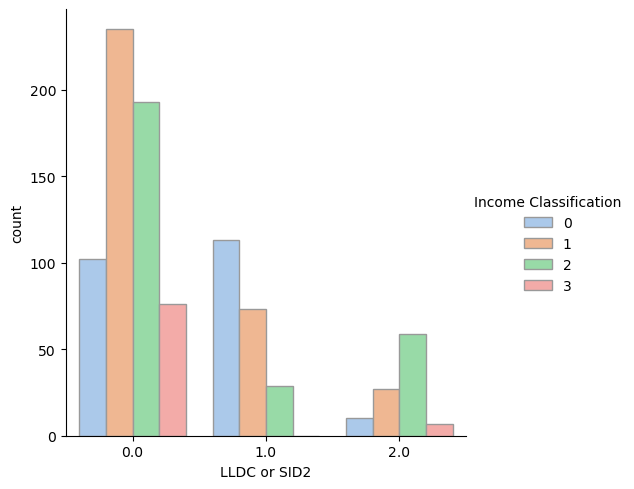

In [7]:
import seaborn as sns

ax = sns.catplot(x="LLDC or SID2", hue="Income Classification", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)

In [8]:
# .33 Quantile

df['Stunting'].quantile(.33)
# = 20
# .67 Quantile
df['Stunting'].quantile(.67)
# = 36.624

36.624

In [9]:
# Partition the data into three categories based on the median
df['Stunting_Category'] = [
    'Severe' if x > 36.624 else 'Mild' if x < 20 else 'Moderate'
    for x in df['Stunting']
]

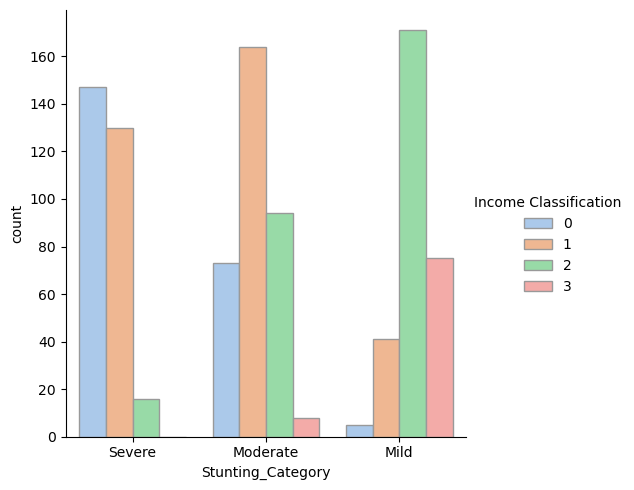

In [10]:
import seaborn as sns

ax = sns.catplot(x="Stunting_Category", hue="Income Classification", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)

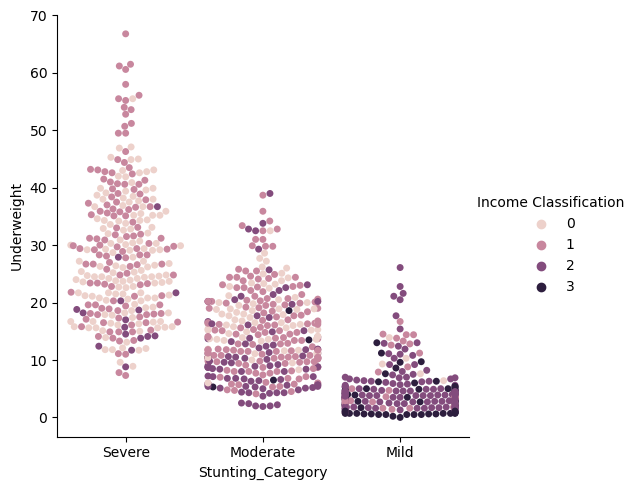

In [11]:
sns.catplot(data=df, kind="swarm", x="Stunting_Category", y="Underweight", hue="Income Classification")

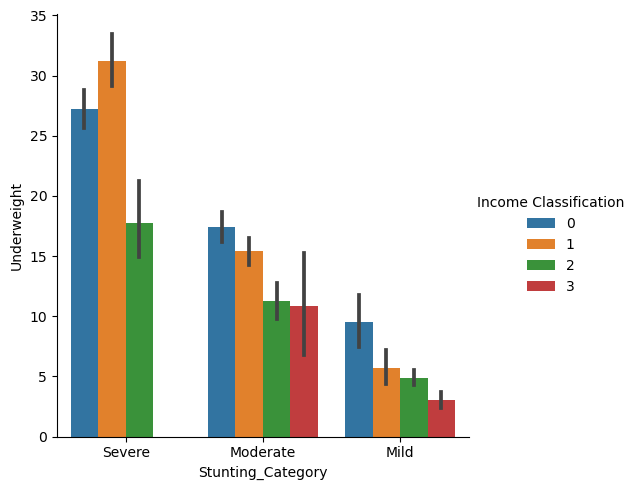

In [21]:
sns.catplot(data=df, kind="bar", x="Stunting_Category", y="Underweight", hue="Income Classification")

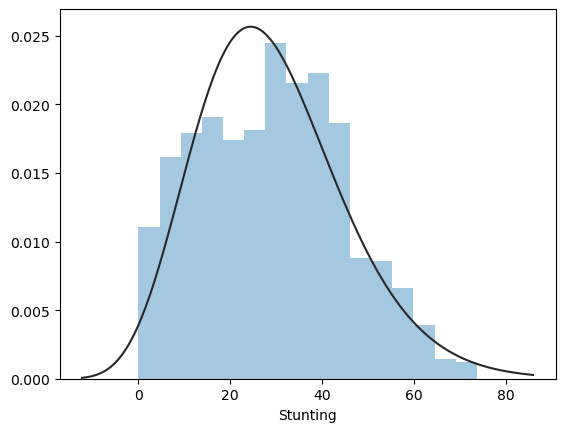

In [22]:
from scipy import stats
ax = sns.distplot(df['Stunting'], kde=False, fit=stats.gamma)

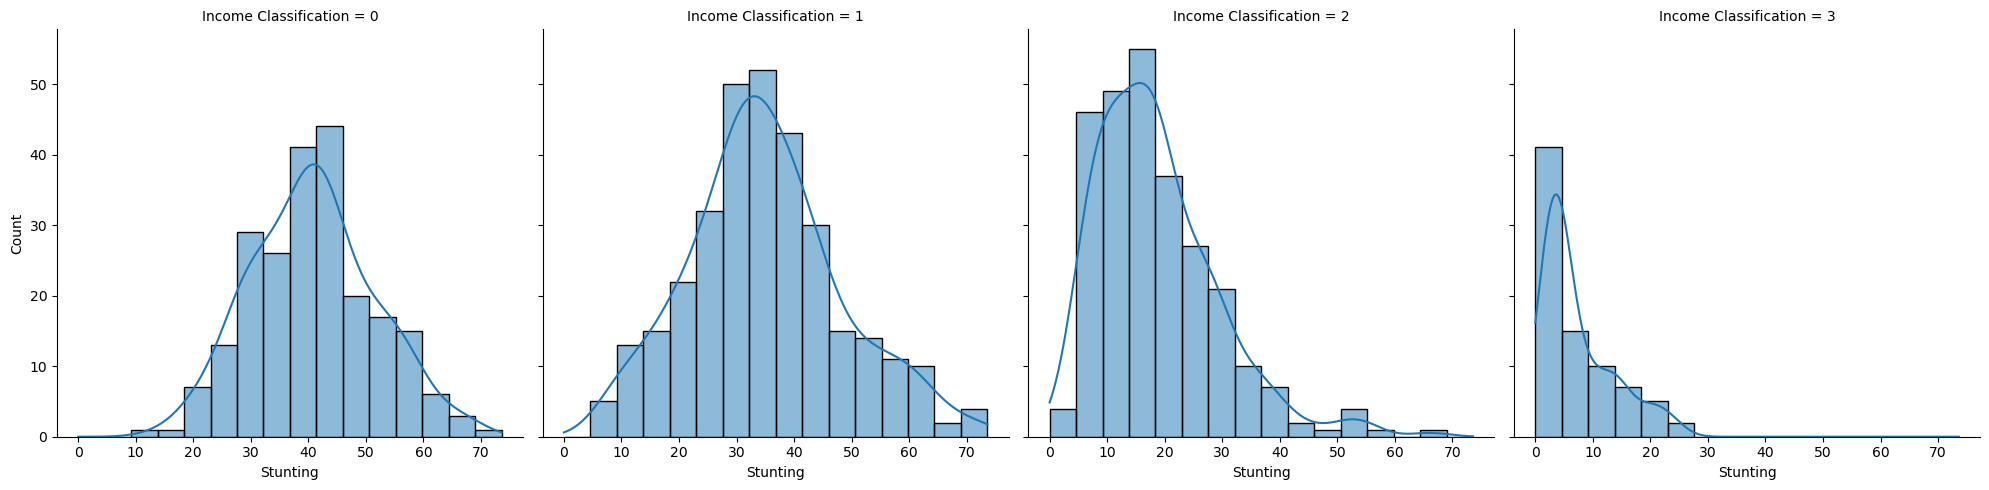

In [23]:
sns.displot(data=df, x="Stunting", col="Income Classification", kde=True)


In [ ]:
sns.jointplot(data=df, y="Overweight", x="Underweight", hue="Stunting_Category")

## Scatter Plots

This is to plot two numeric/continuous variales

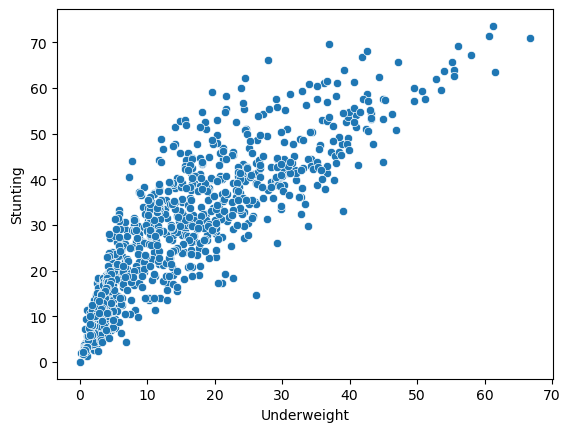

In [24]:
ax = sns.scatterplot(data=df, y="Stunting", x="Underweight")

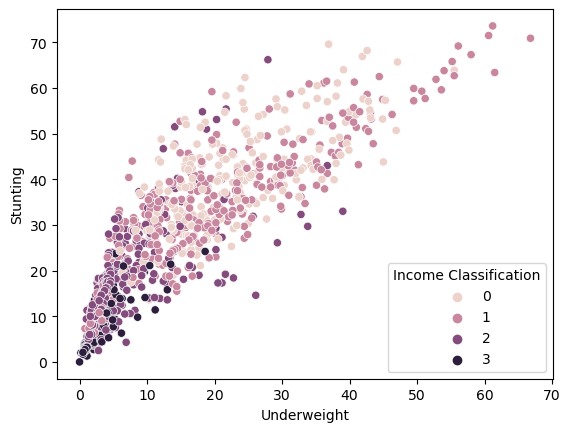

In [25]:
# adding a categorical variable
ax = sns.scatterplot(data=df, y="Stunting", x="Underweight", hue="Income Classification")

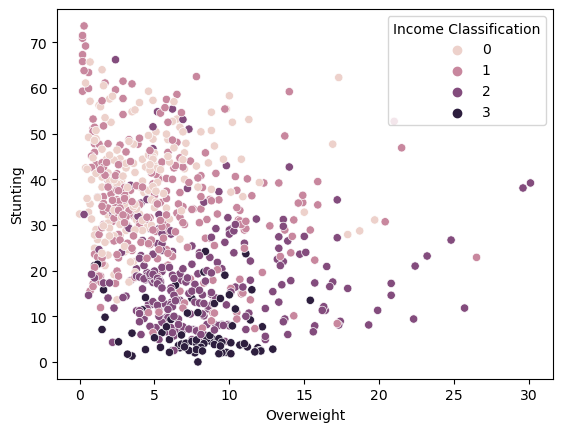

In [26]:
ax = sns.scatterplot(data=df, y="Stunting", x="Overweight", hue="Income Classification")

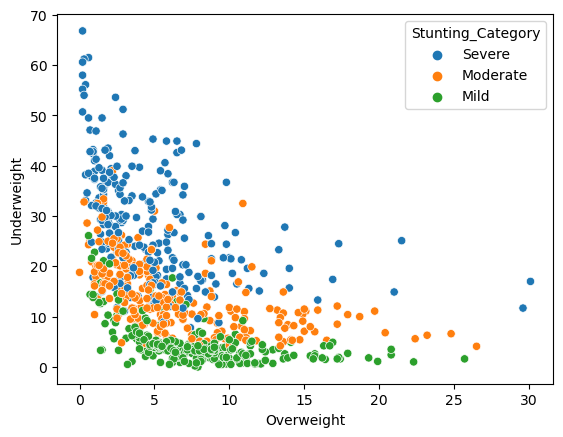

In [27]:
ax = sns.scatterplot(data=df, y="Underweight", x="Overweight", hue="Stunting_Category")

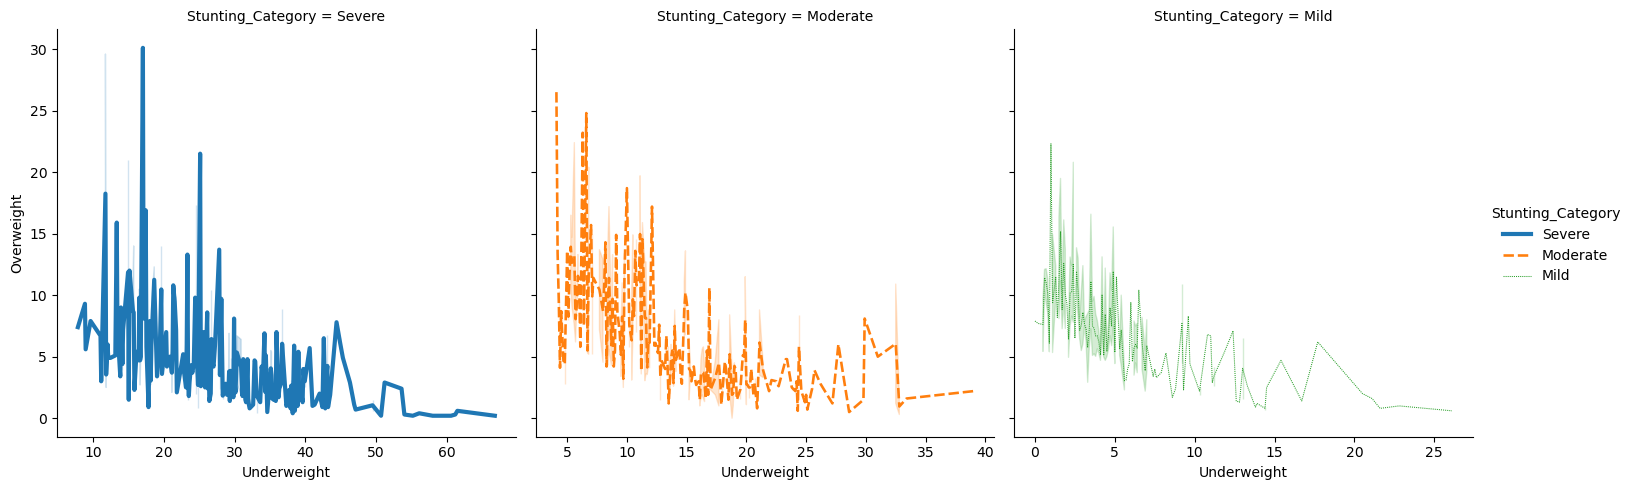

In [28]:
sns.relplot(
    data=df, kind="line",
    x="Underweight", y="Overweight", col="Stunting_Category",
    hue="Stunting_Category", size="Stunting_Category", style="Stunting_Category",
    facet_kws=dict(sharex=False),
)

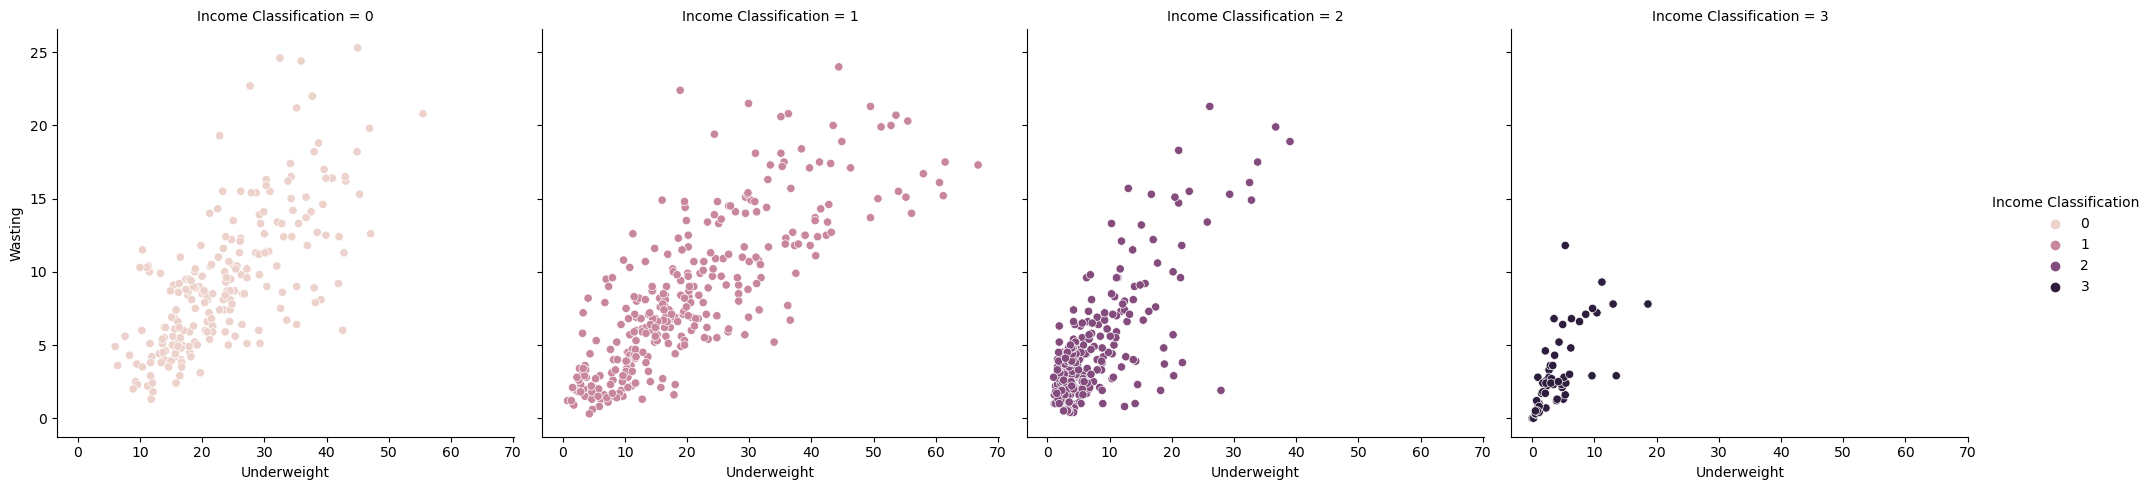

In [37]:
sns.relplot(
    data=df,
    x="Underweight", y="Wasting", col="Income Classification",
    hue="Income Classification",
)

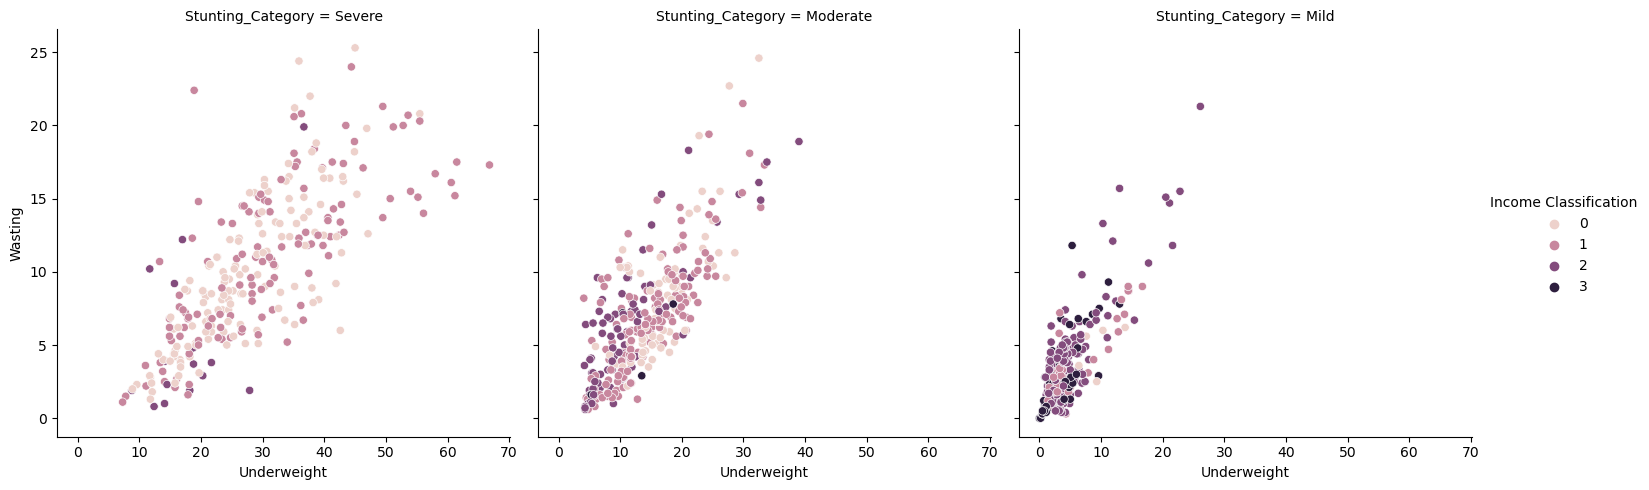

In [49]:
sns.relplot(
    data=df,
    x="Underweight", y="Wasting", col="Stunting_Category",
    hue="Income Classification",
)

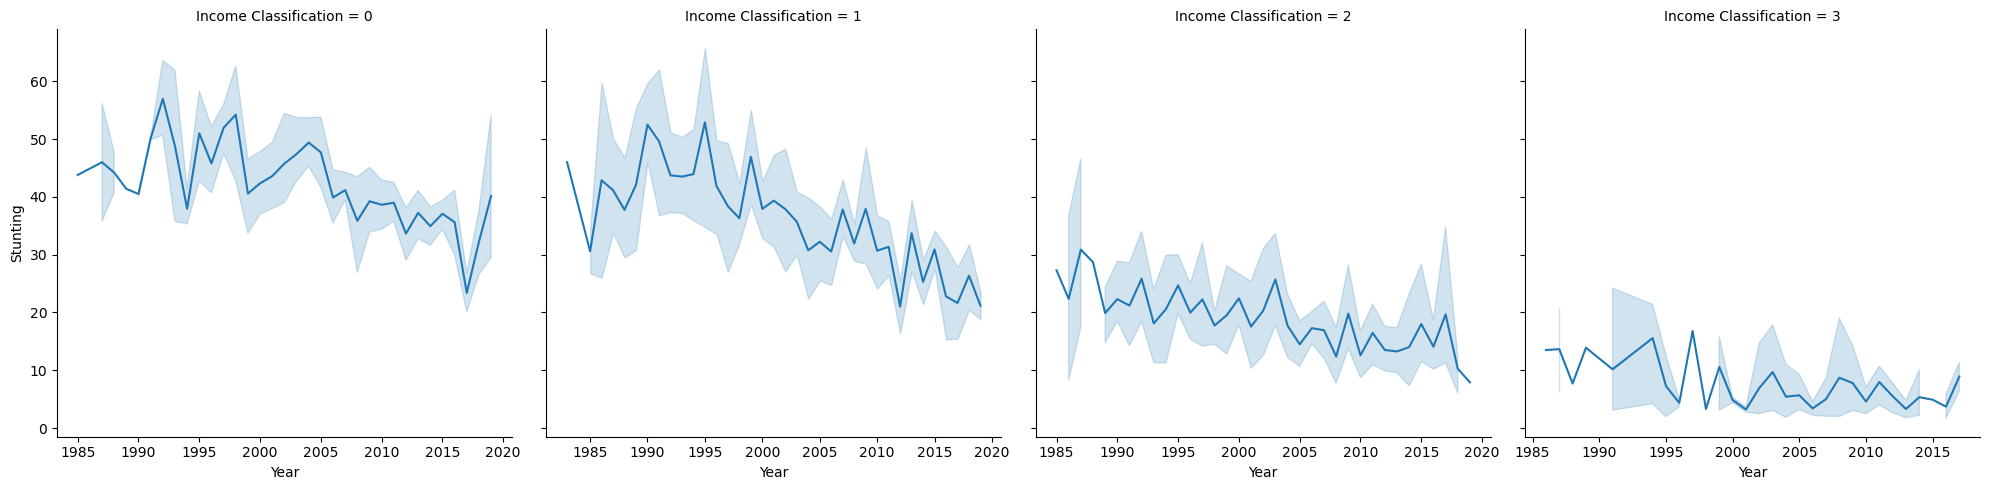

In [47]:

sns.relplot(
    data=df, kind="line",
    x="Year", y="Stunting", col="Income Classification",
    facet_kws=dict(sharex=False),
)

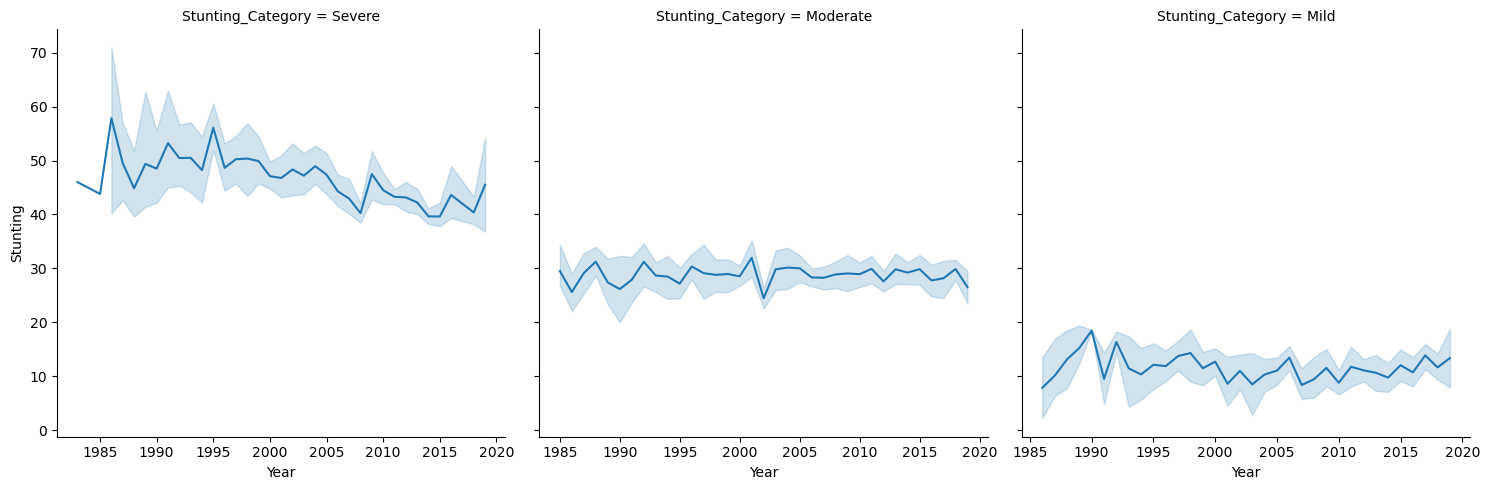

In [48]:

sns.relplot(
    data=df, kind="line",
    x="Year", y="Stunting", col="Stunting_Category",
    facet_kws=dict(sharex=False),
)

## References

References: https://seaborn.pydata.org/tutorial/introduction.html

In [38]:
df

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),...,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s),Stunting_Category
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",...,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877,Severe
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,...,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353,Severe
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",...,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573,Severe
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,...,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443,Severe
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",...,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,ZWE,ZIMBABWE,2009,2009,1,0.0,1.0,1.0,"6,196",...,2.4,3.5,35.1,11.7,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279,Moderate
920,920,ZWE,ZIMBABWE,2010-11,2010,1,0.0,1.0,1.0,"5,414",...,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281,Moderate
921,921,ZWE,ZIMBABWE,2014,2014,1,0.0,1.0,1.0,"9,591",...,3.2,3.6,27.6,11.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182,Moderate
922,922,ZWE,ZIMBABWE,2015,2015,1,0.0,1.0,1.0,"6,380",...,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788,Moderate


##### 1.3 Handle some missing and fix variables types

In [ ]:
# Replace missing values by the median
#X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
#X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
#X['Pclass'] = X['Pclass'].astype(object)

##### 1.4 Encode categorical variable

In [ ]:
X = pd.get_dummies(X)

##### 1.5 Split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

##### 1.6 Setup and Train a gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
r1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)


ypred_test = r1.predict(x_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred_test, y_test)
print('===============')
print('Confusion Matrix:')
print(mat)
print('===============')
print('Testing Accuracy:')
print(mat.diagonal().sum()/mat.sum())
print('===============')


### Variable Importance

In [8]:
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

NameError: name 'r1' is not defined

### Learning Rate

In [ ]:
# Plot the Training Accuracy of gradient boosting with n_estimators running from n1 to n2 
# and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = pd.concat([ac, pd.DataFrame([[rs, lr, boost.score(x_train,y_train)]], 
                                    columns=list(['Rounds','Learning Rate','Training Accuracy']))], 
                       ignore_index=True)
        

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Accuracy", 
                  hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. Learning slow', 
        fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

In [ ]:
# Plot the Training Accuracy of gradient boosting with n_estimators running from n1 to n2 
# and two learning rates l1 and l2. 

n1 = 1
n2 = 100
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = GradientBoostingClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = pd.concat([ac, pd.DataFrame([[rs, lr, boost.score(x_test,y_test)]], 
                                    columns=list(['Rounds','Learning Rate','Test Accuracy']))], 
                       ignore_index=True)
        

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Test Accuracy", 
                  hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. Learning slow', 
        fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

### 2. Practice

Predicting Breast Cancer.

1. Import the breast cancer dataset. The data can be downloaded at this [link](https://bryantstats.github.io/math460/python/breast_cancer.csv)

2. Set the input (X) and output (y) (Use `df.columns` to see all the columns to easier copy/paste). Split the data into 60% training and 40% testing

3. Train a gradient boosting model with 200 n_estimators and .1 learning rare. What is testing accuracy of the gradient boosting?

4. What is the most important variable according to the above gradient boosting model in predicting breast cancer?

5. Find a gradient boosting (try a few different of `n_estimators` and `learning_rate`) that have a higher testing accuracy than the above gradient boosting. What is the n_estimators and learning of this gradient boosting? 